In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [13]:
names = ['id', 'png', 'url', 'title', 'author', 'target', 'genre'] 
train_dataframe = pd.read_csv('./Data/book30-listing-train.csv', names = names, encoding='"ISO-8859-1"')
train_dataframe.head()

,id,png,url,title,author,target,genre
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs
1,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books
2,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation
3,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles
4,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors


In [14]:
print(len(train_dataframe))

51300


In [15]:
train_dataframe = train_dataframe[train_dataframe['target'].isin([1, 2, 4, 5, 7, 15, 20, 23, 24, 27])]
len(train_dataframe)

17100

In [16]:
sampled_train = train_dataframe.groupby("target").sample(n=1710, random_state=28)
sampled_train.head()

,id,png,url,title,author,target,genre
41020,1250041678,1250041678.jpg,http://ecx.images-amazon.com/images/I/51lB5Al8...,Sex in the Museum: My Unlikely Career at New Y...,Sarah Forbes,1,Biographies & Memoirs
27333,61153915,0061153915.jpg,http://ecx.images-amazon.com/images/I/51KtiSfd...,Cooked: My Journey from the Streets to the Stove,Jeff Henderson,1,Biographies & Memoirs
34248,871914557,0871914557.jpg,http://ecx.images-amazon.com/images/I/51wcla2M...,Johnny Miller (Creative Education Sports Super...,Sam Hasegawa,1,Biographies & Memoirs
44776,1893554198,1893554198.jpg,http://ecx.images-amazon.com/images/I/51GkkQ7h...,Against All Hope: A Memoir of Life in Castro's...,Armando Valladares,1,Biographies & Memoirs
29342,1451635672,1451635672.jpg,http://ecx.images-amazon.com/images/I/41J3F3Mf...,Casino: Love and Honor in Las Vegas,Nicholas Pileggi,1,Biographies & Memoirs


In [17]:
img_list = []
for png in sampled_train['png']:
    print(png)
    img_list.append(imread('./Data/224x224/' + png, as_gray=False).flatten())

1250041678.jpg
0061153915.jpg
0871914557.jpg
1893554198.jpg
1451635672.jpg
0071342672.jpg
1101965169.jpg
1903254698.jpg
0385526172.jpg
0595326404.jpg
1609497333.jpg
0375724605.jpg
048628820X.jpg
0883681595.jpg
0451416392.jpg
0848814029.jpg
0465076017.jpg
0743264460.jpg
0915745569.jpg
1600789617.jpg
0738530158.jpg
0393045250.jpg
0804114641.jpg
0143120107.jpg
1598571133.jpg
0310269008.jpg
0899571123.jpg
B0077T5WKA.jpg
0062061577.jpg
1452652341.jpg
0385536399.jpg
1451648286.jpg
0738519723.jpg
1514747561.jpg
0062224069.jpg
1890771260.jpg
1414334494.jpg
0553381903.jpg
0060914254.jpg
0415270170.jpg
0140080988.jpg
0316548189.jpg
0801880726.jpg
1444730312.jpg
0393324141.jpg
1742584942.jpg
1409129462.jpg
1250064643.jpg
1780228821.jpg
1613733526.jpg
1495226328.jpg
0803226616.jpg
1938591259.jpg
1298499046.jpg
157441237X.jpg
1879960737.jpg
0385240236.jpg
0803254776.jpg
1581606397.jpg
0316268844.jpg
1849025797.jpg
1551525941.jpg
0691150389.jpg
0674766911.jpg
0809067579.jpg
1907650571.jpg
0743202414

In [18]:
img_array = np.array(img_list)
img_data = pd.DataFrame(img_array)
img_data['png'] = list(sampled_train['png'])
img_data['title'] = list(sampled_train['title'])
img_data['target'] = list(sampled_train['target'])

In [19]:
img_data.head()

,0,1,2,3,4,5,6,7,8,9,...,150521,150522,150523,150524,150525,150526,150527,png,title,target
0,230,39,135,228,37,133,226,35,131,226,...,50,61,24,42,77,35,55,1250041678.jpg,Sex in the Museum: My Unlikely Career at New Y...,1
1,3,3,3,3,3,3,3,3,3,3,...,62,31,31,29,15,17,16,0061153915.jpg,Cooked: My Journey from the Streets to the Stove,1
2,222,204,192,217,198,181,213,193,168,225,...,153,186,170,171,199,183,183,0871914557.jpg,Johnny Miller (Creative Education Sports Super...,1
3,99,109,101,96,106,98,96,106,98,98,...,98,87,118,112,96,127,121,1893554198.jpg,Against All Hope: A Memoir of Life in Castro's...,1
4,255,16,34,255,17,34,255,19,32,252,...,2,31,6,2,31,6,2,1451635672.jpg,Casino: Love and Honor in Las Vegas,1


In [20]:
img_data.shape

(17100, 150531)

In [22]:
pca = PCA(n_components=1500)
pca.fit(img_array)

PCA(n_components=1500)

In [23]:
print(sum(pca.explained_variance_ratio_[0:1420]))

0.8889737045258003


In [24]:
#2428 for 95% retained variance
for i in range(3000):
    if sum(pca.explained_variance_ratio_[0:i]) > 0.80:
        print(i)
        break;

334


In [25]:
img_array_pca = pca.transform(img_array)[:, 0:1420]

In [26]:
temp = img_array_pca

In [27]:
img_data_pca = pd.DataFrame(img_array_pca)
img_data_pca['png'] = list(sampled_train['png'])
img_data_pca['title'] = list(sampled_train['title'])
img_data_pca['target'] = list(sampled_train['target'])

In [28]:
pca_graph = img_data_pca.groupby("target").sample(n=25, random_state=28)
pca_graph.head()

,0,1,2,3,4,5,6,7,8,9,...,1413,1414,1415,1416,1417,1418,1419,png,title,target
1194,-30942.672998,-367.326109,-5997.196281,-96.458083,5512.715591,-863.894421,3799.693470,-4768.006533,-981.376109,450.620659,...,-55.629373,135.852871,-155.154528,-65.279854,38.364370,108.498836,-172.963859,0743270754.jpg,Team of Rivals: The Political Genius of Abraha...,1
597,-15336.896268,-295.581722,1974.788140,8772.035030,6126.208897,-1328.055154,-7448.973487,2770.044542,319.811331,391.527295,...,-157.140628,-65.149239,-22.718657,-54.201774,-68.061344,190.635328,25.588921,0897501217.jpg,The Bruce Lee Story,1
800,16148.115069,555.431806,-6704.678831,-2164.446686,-1874.770672,-562.388089,-7881.767397,-3827.926465,19.774387,75.887556,...,107.440789,-187.643473,-123.645471,24.020147,28.586089,129.017514,166.384402,0870204629.jpg,Gudrun's Kitchen: Recipes from a Norwegian Family,1
1645,17187.892040,2740.856910,-8529.898275,-4400.046805,-729.297722,-13896.820715,371.682420,-497.242126,3169.823010,-1554.013691,...,137.081350,144.734494,-119.099637,6.972551,18.941303,116.688837,241.833875,0812970497.jpg,FDR,1
639,-10861.280100,1880.144192,-9239.371867,-805.496891,-1129.269517,3933.661103,-5195.934648,1221.755281,-1149.929270,1237.325277,...,63.443031,-144.917299,237.245301,255.964426,37.282710,302.513891,-286.481864,0374525951.jpg,Walking Out on the Boys,1


In [30]:
import plotly.express as px
fig = px.scatter_3d(pca_graph, x=0, y=1, z=2, color='target')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [31]:
img_data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,1413,1414,1415,1416,1417,1418,1419,png,title,target
0,4229.893412,-10819.097549,-3279.395170,-4030.446680,-2771.130648,2211.385062,-1831.914880,5356.565397,20085.589623,-1038.312547,...,-81.298338,-83.070395,39.213544,-131.855771,-18.881102,220.965321,90.772559,1250041678.jpg,Sex in the Museum: My Unlikely Career at New Y...,1
1,-21373.346814,1531.825061,3479.691418,620.190000,-8128.204351,13043.605978,5759.049053,3274.343998,-2098.466868,-601.109879,...,-8.290584,231.870804,-213.775591,277.871663,-505.580179,-292.156945,-119.988227,0061153915.jpg,Cooked: My Journey from the Streets to the Stove,1
2,505.285476,-1252.048721,-6782.958247,-304.335295,1021.129066,-2456.928909,3323.872721,-4038.110169,1409.685170,440.200115,...,-89.774636,-253.998572,44.800630,32.710972,-79.111594,-141.858603,20.519785,0871914557.jpg,Johnny Miller (Creative Education Sports Super...,1
3,-8197.911482,5395.980519,-2676.821977,-794.872244,3817.952568,146.938880,232.372145,-2088.968799,-772.125490,1589.682500,...,9.880963,-119.716322,11.783813,135.688309,-14.448048,-158.965444,89.870632,1893554198.jpg,Against All Hope: A Memoir of Life in Castro's...,1
4,-33513.848096,-4332.391439,779.631208,-592.593761,5192.891747,-1708.881102,2888.841590,-7907.328237,4982.926347,4322.866402,...,-69.827875,55.164088,-63.971765,215.304248,-273.401617,109.331591,-3.340538,1451635672.jpg,Casino: Love and Honor in Las Vegas,1


In [32]:
img_data_pca.to_csv('./image_data.csv')

In [33]:
#img_data_pca = img_data_pca[img_data_pca['target'] < 10]
img_data_pca = pd.read_csv("image_data.csv")

In [34]:
#x_train, y_train = img_data_cut[list(set(img_data_cut.columns) - set(['png', 'title', 'target']))], img_data_cut['target']
x_train, x_test, y_train, y_test = train_test_split(img_data_pca[list(set(img_data_pca.columns) - set(['png', 'title', 'target']))], img_data_pca['target'], test_size= 0.1, stratify=img_data_pca['target'])
#x_train, x_test, y_train, y_test = train_test_split(img_data[list(set(img_data.columns) - set(['png', 'title', 'target']))], img_data['target'], test_size= 0.1, stratify=img_data_pca['target'])

In [35]:
print(np.unique(y_train, return_counts=True))

(array([ 1,  2,  4,  5,  7, 15, 20, 23, 24, 27], dtype=int64), array([1539, 1539, 1539, 1539, 1539, 1539, 1539, 1539, 1539, 1539],
      dtype=int64))


In [40]:
#model = SVC(kernel ='poly', decision_function_shape='ovo')
#model.fit(x_train, y_train)
from sklearn.neural_network import MLPClassifier


In [41]:
#y_results = model.predict(x_train)
#acc = accuracy_score(y_train, y_results)
#print(acc)
print('help')
mlp = MLPClassifier(hidden_layer_sizes = (1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420), solver= 'lbfgs', max_iter= 1000)
mlp.fit(x_train, y_train)

help


c:\Users\shres\.conda\envs\4641_project\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(1420, 1420, 1420, 1420, 1420, 1420, 1420,
                                  1420),
              max_iter=400, solver='lbfgs')

In [42]:
y_results = mlp.predict(x_test)
acc = accuracy_score(y_test, y_results)
print(acc)

0.5035087719298246


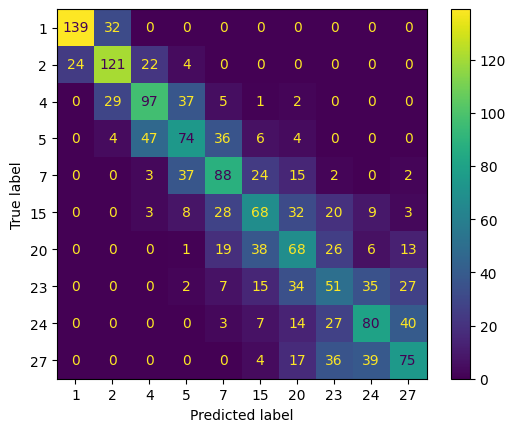

In [43]:
c_matrix = confusion_matrix(y_test, y_results)
c_matrix_plot = ConfusionMatrixDisplay(c_matrix, display_labels=[1, 2, 4, 5, 7, 15, 20, 23, 24, 27])
c_matrix_plot.plot()
plt.show()